In [1]:
import os
import sys
import math
import numpy as np
import numpy.fft as fft
import matplotlib
import matplotlib.pyplot as plt

In [2]:
Lv = 20
N = 2**Lv
print(N)
epsilon = np.zeros(N,dtype='float64')
epsilon[:] = 1.
s = np.random.uniform(0,1,10**6)

1048576


In [3]:
p = 0.7

print(p)
print(1-p)

0.7
0.30000000000000004


In [4]:
def multiProcess(N,Nv,s,p):
    chg = 0
    epsilon = np.zeros(N,dtype='float64')
    epsilon[:] = 1.
    for k in range(Nv):
        div = 2**(k+1)
        chk = N//div
        for i in range(div//2):
            rnd = s[chg]
            chg += 1
            if(rnd >= 0.5):
                epsilon[(2*i+0)*chk:(2*i+1)*chk] *= p
                epsilon[(2*i+1)*chk:(2*i+2)*chk] *= (1-p)
            else:
                epsilon[(2*i+0)*chk:(2*i+1)*chk] *= (1-p)
                epsilon[(2*i+1)*chk:(2*i+2)*chk] *= p
    return epsilon

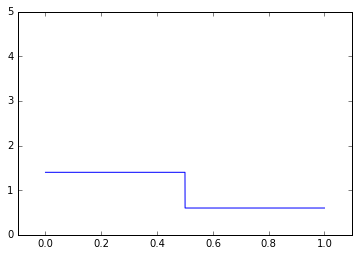

In [5]:
Nv = 1
epsilon = multiProcess(N,Nv,s,p)

x = np.arange(0,N)
x = x/N
epsAvg = np.average(epsilon)
plt.xlim(-0.1,1.1)
plt.ylim(0,5)
plt.plot(x,epsilon/epsAvg)

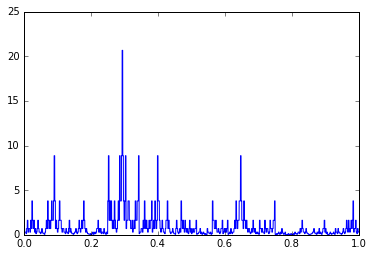

In [6]:
Nv = 9
epsilon = multiProcess(N,Nv,s,p)

x = np.arange(0,N)
x = x/N
epsAvg = np.average(epsilon)
plt.plot(x,epsilon/epsAvg)

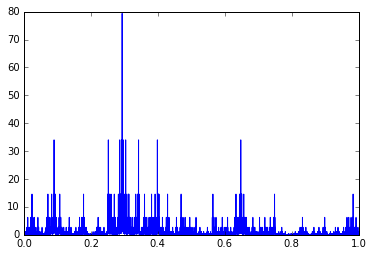

In [44]:
Nv = 13
epsilon = multiProcess(N,Nv,s,p)

x = np.arange(0,N)
x = x/N
epsAvg = np.average(epsilon)
plt.plot(x,epsilon/epsAvg)

In [45]:
L0 = 1.
r = (N//4)/N
dx = 1./N

In [46]:
E0 = np.sum(epsilon*dx)
print(E0)

Lvl = 18
Nb = 2**Lvl
Chk = N//Nb

hst = []
for k in range(Nb):
    Ek = np.sum(epsilon[k*Chk:(k+1)*Chk]*dx)
    alpha = math.log(Ek/E0)/math.log(Chk/N)
    hst.append(alpha)
    #print(alpha)
hst = np.array(hst)

0.0001220703125


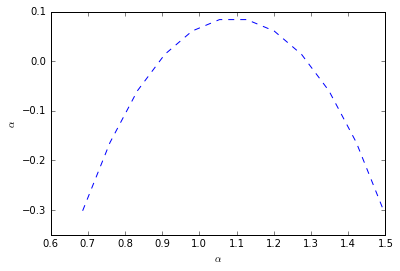

In [47]:
apdf, abins = np.histogram(hst, bins=12, range=None,density=True)
bins = (abins[0:12]+abins[1:13])/2.
lapdf = np.log(apdf)/np.log(N/Chk)
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\alpha$')
plt.plot(bins,lapdf,'b--')

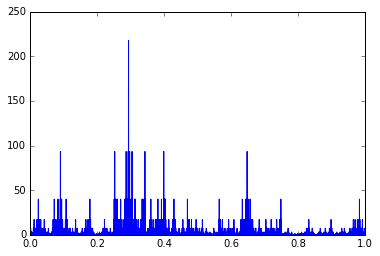

In [48]:
Nv = 16
epsilon2 = multiProcess(N,Nv,s,p)

x = np.arange(0,N)
x = x/N
epsAvg = np.average(epsilon2)
plt.plot(x,epsilon2/epsAvg)

L0 = 1.
r = (N//4)/N
dx = 1./N
E0 = np.sum(epsilon2*dx)

Lvl = 18
Nb = 2**Lvl
Chk = N//Nb

hst2 = []
for k in range(Nb):
    Ek = np.sum(epsilon2[k*Chk:(k+1)*Chk]*dx)
    alpha = math.log(Ek/E0)/math.log(Chk/N)
    hst2.append(alpha)
    #print(alpha)
hst2 = np.array(hst2)

In [49]:
Nbins = 15
bpdf, bbins = np.histogram(hst2, bins=Nbins, range=None,density=True)
bins2 = (bbins[0:Nbins]+bbins[1:(Nbins+1)])/2.
lbpdf = np.log(bpdf)/np.log(N/Chk)

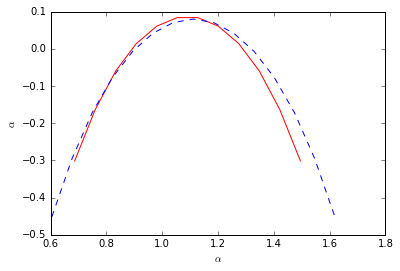

In [50]:
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\alpha$')
plt.plot(bins,lapdf,'r-')
plt.plot(bins2,lbpdf,'b--')

In [ ]:
Nv = 13

qrange =np.arange(2,32,1)
#np.concatenate(qrange,np.arange(-31,1,1))

print(qrange)

qhst = []
for q in qrange:
    Eq = []
    for k in range(Nb):
        Ek = np.sum(epsilon[k*Chk:(k+1)*Chk]*dx)
        Eq.append(Ek**q)
    Eq = np.array(Eq)
    sEq = np.sum(Eq)
    Dq = np.log(sEq/(E0**q))/(Nv*(q-1))
    print(Dq)

[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
 27 28 29 30 31]
-0.491408161552
-0.523785643617
-0.51782581596
-0.508903762926
-0.501421096367
-0.495657275568
-0.49125303394
-0.48784175398
-0.485147292028
-0.482975803432
-0.481192926959
-0.479704758989
-0.47844457557
-0.477364034567
-0.476427412182
-0.475607805914
-0.474884599032
-0.474241738401
-0.473666543221
-0.473148865894
-0.472680490491
-0.472254694391
-0.471865923926
